In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import email
import re
import os
import codecs
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score

Preprocessing: 

We'll initialize the primary dataframe first. The columns include the email's folder, filename, message, and ham or spam label. 0 = ham, 1 = spam.

In [2]:
df = pd.DataFrame(columns = ['folder', 'file', 'email_message', 'classification'])
df

,folder,file,email_message,classification


Initialize labels dataframe.

In [3]:
#directory path
labels_path = "trec06/labels"
df_labels = pd.read_csv("trec06/labels", sep = " ", header = None)
df_labels.columns = ["classification", "filepath"]
#classify ham = 0 and spam = 1
df_labels["classification"] = df_labels["classification"].apply(lambda kv: 0 if kv == "ham" else 1) 
df_labels["filepath"] = df_labels["filepath"].apply(lambda kv: kv.replace("../data/", ""))
df_labels

,classification,filepath
0,0,000/000
1,1,000/001
2,1,000/002
3,0,000/003
4,1,000/004
...,...,...
37817,1,126/017
37818,1,126/018
37819,1,126/019
37820,1,126/020


Listing of folders in the trec06/data directory.

In [4]:
folder_path = "trec06/data"
folders = os.listdir(folder_path)
folders

['000',
 '001',
 '002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '008',
 '009',
 '010',
 '011',
 '012',
 '013',
 '014',
 '015',
 '016',
 '017',
 '018',
 '019',
 '020',
 '021',
 '022',
 '023',
 '024',
 '025',
 '026',
 '027',
 '028',
 '029',
 '030',
 '031',
 '032',
 '033',
 '034',
 '035',
 '036',
 '037',
 '038',
 '039',
 '040',
 '041',
 '042',
 '043',
 '044',
 '045',
 '046',
 '047',
 '048',
 '049',
 '050',
 '051',
 '052',
 '053',
 '054',
 '055',
 '056',
 '057',
 '058',
 '059',
 '060',
 '061',
 '062',
 '063',
 '064',
 '065',
 '066',
 '067',
 '068',
 '069',
 '070',
 '071',
 '072',
 '073',
 '074',
 '075',
 '076',
 '077',
 '078',
 '079',
 '080',
 '081',
 '082',
 '083',
 '084',
 '085',
 '086',
 '087',
 '088',
 '089',
 '090',
 '091',
 '092',
 '093',
 '094',
 '095',
 '096',
 '097',
 '098',
 '099',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',


Initializing alphanumeric characters, punctuation marks, symbols, and stopwords and then dropping them.

In [5]:
num = "0123456789"
esc = re.compile(r'\\[a-z][a-z]?[0-9]+')
tags = re.compile('<.*?>')
punctuation = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~\\"
stop_words = []
#getting the stop words
with open('stop_words.txt', 'r') as file:
    stop_word = file.read().splitlines()
    stop_words = [word for word in stop_word]

In [6]:
#dropping info not needed in the email
def drop_info(msg):
    msg = msg.lower() # stopwords in lowercase so convert to same case for easier preprocessing 
    msg = re.sub(tags, '', msg) # removing tags
    msg = msg.translate(str.maketrans('', '', punctuation)) # removing punctuations
    msg = msg.translate(str.maketrans('', '', num)) # removing numbers
    msg = re.sub(esc, '', repr(msg)) #removing escape chars
    msg = codecs.decode(msg, 'unicode_escape') # converting to unicode chars
    words = msg.split()
    words = [word for word in words if word not in stop_words] # removing stopwords
    msg = " ".join(words) # joining the words into one string
    msg = msg.strip("'")
    return msg

def get_msg(parsed): # getting the message in the email
    msg = ""
    if parsed.is_multipart(): # if email is a multipart
        for part in parsed.walk(): 
            if part.get_content_type() == 'text/plain': # iterate if content is in plaintext
                msg = part.get_payload() # acquire message
                break
                
    else: # if its not multipart then immediately get the message
         msg = parsed.get_payload()
    return msg

Trec06 Dataset preprocessing

In [7]:
# place each email in the dataframe
for folder in folders:
    files = os.listdir(f"{folder_path}/{folder}")
    for file in files:
         with open(f"{folder_path}/{folder}/{file}", "r", encoding = "ISO-8859-1") as e_mail:
            read_email_file = e_mail.read()
            parsed = email.message_from_string(read_email_file)
            msg = get_msg(parsed)
            msg = drop_info(msg)
            # get classification of the email and add it into the main dataframe
            labels_classification = df_labels[df_labels['filepath'] == f"{folder}/{file}"]['classification'].values[0]
            df = pd.concat([df, pd.DataFrame([[folder, file, msg, labels_classification]], columns = ["folder", "file", "email_message", "classification"])], ignore_index = True)
df

,folder,file,email_message,classification
0,000,000,the mailing list queried weeks ago running set...,0
1,000,001,luxury watches buy rolex rolex cartier bvlgar...,1
2,000,002,academic qualifications prestigious nonacc red...,1
3,000,003,greetings verify subscription planfans list ch...,0
4,000,004,try chauncey conferred luscious continued tons...,1
...,...,...,...,...
37817,126,017,great news expec ted infinex ventures infx pri...,1
37818,126,018,the oil sector going crazy weekly gift kkpt th...,1
37819,126,019,httpvdtobjdocscaninfo suffering pain depressio...,1
37820,126,020,u prosperous future increased money earning po...,1


folder that contains files that have been preprocessed, then save the primary dataframe as the file name preprocessed_emails.csv.

In [8]:
if not os.path.exists('preprocessed_files'):
    os.makedirs('preprocessed_files')
df.to_csv("preprocessed_files/preprocessed_emails.csv", index = False)
df.drop(df.index, inplace = True)
df = pd.DataFrame(columns = ["folder", "file", "email_message", "classification"])
df

,folder,file,email_message,classification


Importing Preprocessed Data

In [13]:
df2 = pd.read_csv("./preprocessed_files/preprocessed_emails.csv")

#Folders 0-70: Train Set
training_df = df2[df2['folder'] < 71]
#Folders 71-126: Test Set
testing_df = df2[df2['folder'] >= 71]
training_ham_df = training_df[training_df['classification'] == 0]
training_spam_df = training_df[training_df['classification'] == 1]
df2

,folder,file,email_message,classification
0,0,0,the mailing list queried weeks ago running set...,0
1,0,1,luxury watches buy rolex rolex cartier bvlgar...,1
2,0,2,academic qualifications prestigious nonacc red...,1
3,0,3,greetings verify subscription planfans list ch...,0
4,0,4,try chauncey conferred luscious continued tons...,1
...,...,...,...,...
37817,126,17,great news expec ted infinex ventures infx pri...,1
37818,126,18,the oil sector going crazy weekly gift kkpt th...,1
37819,126,19,httpvdtobjdocscaninfo suffering pain depressio...,1
37820,126,20,u prosperous future increased money earning po...,1


In [14]:
testing_df

,folder,file,email_message,classification
21300,71,0,where hesitantly derive perverse satisfaction ...,1
21301,71,1,things perform experiment display will remain...,0
21302,71,2,best offer month viggra ci ialis vaiium xa na...,1
21303,71,3,de ar wne cr doesnt matter ow real st mmed ia ...,1
21304,71,4,special offer adobe video collection adobe pr...,1
...,...,...,...,...
37817,126,17,great news expec ted infinex ventures infx pri...,1
37818,126,18,the oil sector going crazy weekly gift kkpt th...,1
37819,126,19,httpvdtobjdocscaninfo suffering pain depressio...,1
37820,126,20,u prosperous future increased money earning po...,1


In [15]:
training_ham_df

,folder,file,email_message,classification
0,0,0,the mailing list queried weeks ago running set...,0
3,0,3,greetings verify subscription planfans list ch...,0
5,0,5,its quiet quiet well straw poll plan running,0
6,0,6,its working departed totally bell labs recomme...,0
10,0,10,greetings mass acknowledgement signed planfans...,0
...,...,...,...,...
21270,70,270,here equation generate prime numbers equation ...,0
21271,70,271,here equation generate prime numbers equation ...,0
21288,70,288,dear dmdx users guidance generating dmdx item...,0
21293,70,293,hi built handyboard works great testmotor pass...,0


In [17]:
training_spam_df

,folder,file,email_message,classification
1,0,1,luxury watches buy rolex rolex cartier bvlgar...,1
2,0,2,academic qualifications prestigious nonacc red...,1
4,0,4,try chauncey conferred luscious continued tons...,1
7,0,7,from nbc today body diet beaches magazines hol...,1
8,0,8,the oil sector going crazy weekly gift kkpt th...,1
...,...,...,...,...
21294,70,294,txtadd,1
21295,70,295,bbtijclnabb bbinpqnejgmbb httpgethighbizez bbl...,1
21296,70,296,special offer adobe video collection adobe pr...,1
21297,70,297,doctype html public wcdtd html transitionalen ...,1


We'll extract unique training set phrases and their spam and ham counts. We'll remove 10000 frequent terms to lower dictionary elements.

In [18]:
#Dictionary variable which contains the words and their counts
dictio = {}

for index, row in training_df.iterrows():
    for word in str(row['email_message']).split():
        if word in dictio:
            dictio[word] += 1
        else:
            dictio[word] = 1

#sort dictionary in descending order and extract the 10,000 most common words
sorted_dict = sorted(dictio.items(), key = lambda kv: kv[1], reverse = True)
most_common_words = dict(sorted_dict[:10000])
most_common_words

{'bbbb': 16633,
 'will': 11325,
 'board': 5169,
 'company': 4523,
 'price': 4497,
 'gold': 4252,
 'email': 4086,
 'list': 3950,
 'adobe': 3913,
 'time': 3830,
 'nil': 3830,
 'help': 3801,
 'send': 3655,
 'message': 3613,
 'dont': 3573,
 'subject': 3568,
 'crustl': 3295,
 'received': 3093,
 'program': 3081,
 'Ã¨': 2908,
 'windows': 2867,
 'work': 2782,
 'professional': 2782,
 'Ã': 2760,
 'wrote': 2688,
 'well': 2650,
 'ms': 2599,
 'good': 2498,
 'china': 2484,
 'number': 2463,
 'university': 2436,
 'problem': 2361,
 'file': 2247,
 'office': 2247,
 'stock': 2243,
 'handyboard': 2231,
 'hi': 2230,
 'hb': 2190,
 'bit': 2188,
 'de': 2170,
 'Ã\xadÃ': 2161,
 'corp': 2142,
 'info': 2135,
 'microsoft': 2128,
 'current': 2083,
 'add': 2062,
 'studies': 2004,
 'pro': 2000,
 'contenttype': 1973,
 'news': 1971,
 'code': 1952,
 'development': 1936,
 'find': 1927,
 'womens': 1888,
 'Ã¢': 1878,
 'great': 1855,
 'people': 1846,
 'today': 1804,
 'read': 1797,
 'best': 1797,
 'system': 1775,
 'save': 175

<b>Creating the feature matrices.<b>

In [19]:
# Feature matrix for spam training set
featurematrix_spam = np.zeros((len(training_spam_df), 10000))
list_most_common_words = list(most_common_words.keys())

for index in range(len(training_spam_df)):
    for word in str(training_spam_df.iloc[index]['email_message']).split():
        if word in most_common_words:
            featurematrix_spam[index][list_most_common_words.index(word)] = 1

featurematrix_spam

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
# Feature matrix for ham training set
featurematrix_ham = np.zeros((len(training_ham_df), 10000))

for index in range(len(training_ham_df)):
    for word in str(training_ham_df.iloc[index]['email_message']).split():
        if word in most_common_words:
            featurematrix_ham[index][list_most_common_words.index(word)] = 1

featurematrix_ham

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<b>Computing the Priors.<b>
    
    P(𝘤 = 𝘩𝘢𝘮) = Nₕₐₘ/Ndₒc
    P(𝘤 = 𝘴𝘱𝘢𝘮) = Nₛₚₐₘ/Ndₒc

In [22]:
#Number of ham and spam emails in the training set and total number of emails.
nham = len(training_ham_df)
nspam = len(training_spam_df)
ndoc = len(training_df)

#Formulas for the priors as given.
p_ham = nham/ndoc
p_spam = nspam/ndoc

# ham and spam priors
print(f"P(c = ham) = {p_ham}")
print(f"P(c = spam) = {p_spam}")

P(c = ham) = 0.3531924882629108
P(c = spam) = 0.6468075117370892


<b>Computing the Likelihood of each word.<b>
    
   P(Wi|spam) = count(Wi , spam) / (Σcount(w,spam))
    
   P(Wi|ham) = count(Wi , ham) / (Σcount(w,ham))

    

In [51]:
#computing the likelihoods of each word with laplace smoothing.
#initialize the probability of each word, get their wordcounts and total number of words in the spam and ham
def laplace_smoothing(featurematrix_spam, featurematrix_ham):
    prob_spam = np.zeros(len(most_common_words))
    prob_ham = np.zeros(len(most_common_words))
    wordcount_spam = np.sum(featurematrix_spam, axis = 0)
    wordcount_ham = np.sum(featurematrix_ham, axis = 0)
    totalwords_spam = np.sum(wordcount_spam)
    totalwords_ham = np.sum(wordcount_ham)
    
    param = 1 #laplace smooting paramater and classes
    num_of_classes = 2
    
    # Laplace smoothing probability formula
    for i in range(len(most_common_words)):
        prob_spam[i] = (wordcount_spam[i] + param)/(totalwords_spam + param*num_of_classes)
        prob_ham[i] = (wordcount_ham[i] + param)/(totalwords_ham + param*num_of_classes)
    return prob_spam, prob_ham

likelihood_spam, likelihood_ham = laplace_smoothing(featurematrix_spam, featurematrix_ham)

#probability result from laplace smoothing.
print(f"Laplace smoothing gives a likelihood spam probability of {likelihood_spam} and likelihood ham probability of {likelihood_ham}.")

Laplace smoothing gives a likelihood spam probability of [2.06551392e-03 4.89809168e-03 9.93847926e-04 ... 4.22440953e-05
 2.22337344e-06 2.22337344e-06] and likelihood ham probability of [8.30925956e-06 6.38428110e-03 5.58659218e-03 ... 1.38487659e-05
 3.60067914e-05 4.98555574e-05].


<b>Classifying the emails.<b>

In [24]:
def classifying_emails(email, likelihood_ham, likelihood_spam, p_ham, p_spam):
    # ham and spam log probabilities.
    log_prob_ham = 0
    log_prob_spam = 0
    words = str(email).split()
    # iteration for computing ham and spam log probs.
    for word in words:
        if word in most_common_words:
            log_prob_ham += np.log(likelihood_ham[list_most_common_words.index(word)])
            log_prob_spam += np.log(likelihood_spam[list_most_common_words.index(word)])
    # add and set the value of the spam and ham to their log probs.   
    log_prob_ham += np.log(p_ham)
    log_prob_spam += np.log(p_spam)
    
    if log_prob_ham > log_prob_spam: # return the highest probability between ham and spam.
        return 0
    else:
        return 1


training_df['pred'] = training_df['email_message'].apply(lambda kv: classifying_emails(kv, likelihood_ham, likelihood_spam, p_ham, p_spam))


C:\Users\Joever Eduard\AppData\Local\Temp\ipykernel_3568\1432044360.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_df['pred'] = training_df['email_message'].apply(lambda kv: classifying_emails(kv, likelihood_ham, likelihood_spam, p_ham, p_spam))


Get number of predictions for training_df

In [26]:
count = 0
for index, row in training_df.iterrows():
    if float(row['classification']) == float(row['pred']):
        count += 1
        
print("From {} emails, {} are correctly categorised. {}% of emails are accurately categorised.".format(len(training_df), count, count/len(training_df)*100))

From 21300 emails, 20423 are correctly categorised. 95.88262910798122% of emails are accurately categorised.


<b>Testing the Classifier.<b>

In [28]:
testing_df['pred'] = testing_df['email_message'].apply(lambda kv: classifying_emails(kv, likelihood_ham, likelihood_spam, p_ham, p_spam))
testing_df

C:\Users\Joever Eduard\AppData\Local\Temp\ipykernel_3568\386546395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_df['pred'] = testing_df['email_message'].apply(lambda kv: classifying_emails(kv, likelihood_ham, likelihood_spam, p_ham, p_spam))


,folder,file,email_message,classification,pred
21300,71,0,where hesitantly derive perverse satisfaction ...,1,1
21301,71,1,things perform experiment display will remain...,0,0
21302,71,2,best offer month viggra ci ialis vaiium xa na...,1,1
21303,71,3,de ar wne cr doesnt matter ow real st mmed ia ...,1,1
21304,71,4,special offer adobe video collection adobe pr...,1,1
...,...,...,...,...,...
37817,126,17,great news expec ted infinex ventures infx pri...,1,1
37818,126,18,the oil sector going crazy weekly gift kkpt th...,1,1
37819,126,19,httpvdtobjdocscaninfo suffering pain depressio...,1,1
37820,126,20,u prosperous future increased money earning po...,1,1


Get number of predictions for testing_df

In [29]:
count = 0
for index, row in testing_df.iterrows():
    if float(row['classification']) == float(row['pred']):
        count += 1
        
print("From {} emails, {} are correctly categorised. {}% of emails are accurately categorised.".format(len(testing_df), count, count/len(testing_df)*100))

From 16522 emails, 15371 are correctly categorised. 93.03353104950975% of emails are accurately categorised.


<b>Performance Evaluation<b>

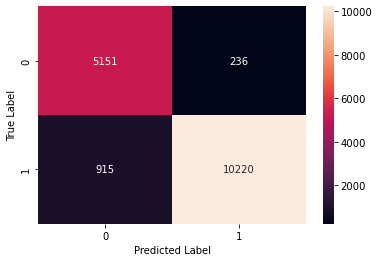

True Positive Rate (TP) - 10220
False Positive Rate (FP) - 236
True Negative Rate (TN) - 5151
False Negative Rate (FN) - 915


In [30]:
# confusion matrix
actual = np.array(testing_df['classification'])
predicted = np.array(testing_df['pred'])

confusion_matrix = metrics.confusion_matrix(actual, predicted, labels = [0, 1])

sns.heatmap(confusion_matrix, annot = True, fmt = 'd')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("True Positive Rate (TP) - {}".format(confusion_matrix[1][1])) 
print("False Positive Rate (FP) - {}".format(confusion_matrix[0][1]))
print("True Negative Rate (TN) - {}".format(confusion_matrix[0][0])) 
print("False Negative Rate (FN) - {}".format(confusion_matrix[1][0])) 



Spam Filter Evaluation

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score 

accuracy = accuracy_score(actual, predicted)
precision = precision_score(actual, predicted)
recall = recall_score(actual, predicted)


print("Accuracy : {}".format(accuracy))
print("Precision : {}".format(precision))
print("Recall : {}".format(recall))


Accuracy : 0.9303353104950974
Precision : 0.9774292272379494
Recall : 0.9178266726537944


<b>Results and Discussion<b>

1. What is the effect of removing stop words in terms of precision, recall, and accuracy?
Show a plot or a table of these results.

In [32]:
df3 = pd.DataFrame(columns = ["folder", "file", "email_message", "classification"])
df3

,folder,file,email_message,classification


In [33]:
path_to_lab = "trec06/labels"
df_lab = pd.read_csv("trec06/labels", sep = " ", header = None)
df_lab.columns = ["classification", "filepath"]
df_lab["classification"] = df_lab["classification"].apply(lambda kv: 0 if kv == "ham" else 1)
df_lab["filepath"] = df_lab["filepath"].apply(lambda kv: kv.replace("../data/", ""))
df_lab

,classification,filepath
0,0,000/000
1,1,000/001
2,1,000/002
3,0,000/003
4,1,000/004
...,...,...
37817,1,126/017
37818,1,126/018
37819,1,126/019
37820,1,126/020


In [34]:
folder_path = "trec06/data"
folders = os.listdir(folder_path)
folders 

['000',
 '001',
 '002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '008',
 '009',
 '010',
 '011',
 '012',
 '013',
 '014',
 '015',
 '016',
 '017',
 '018',
 '019',
 '020',
 '021',
 '022',
 '023',
 '024',
 '025',
 '026',
 '027',
 '028',
 '029',
 '030',
 '031',
 '032',
 '033',
 '034',
 '035',
 '036',
 '037',
 '038',
 '039',
 '040',
 '041',
 '042',
 '043',
 '044',
 '045',
 '046',
 '047',
 '048',
 '049',
 '050',
 '051',
 '052',
 '053',
 '054',
 '055',
 '056',
 '057',
 '058',
 '059',
 '060',
 '061',
 '062',
 '063',
 '064',
 '065',
 '066',
 '067',
 '068',
 '069',
 '070',
 '071',
 '072',
 '073',
 '074',
 '075',
 '076',
 '077',
 '078',
 '079',
 '080',
 '081',
 '082',
 '083',
 '084',
 '085',
 '086',
 '087',
 '088',
 '089',
 '090',
 '091',
 '092',
 '093',
 '094',
 '095',
 '096',
 '097',
 '098',
 '099',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',


In [35]:
numb = "0123456789"
escape = re.compile(r'\\[a-z][a-z]?[0-9]+')
html_tags = re.compile('<.*?>') 
punctuations = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~\\"
stopwords = []
with open('stop_words.txt', 'r') as file:
    stopword = file.read().splitlines()
    stopwords = [word for word in stopword]

In [36]:
def remove_info(message):
    wor = message.split()
    message = " ".join(wor)
    message = message.lower()
    message = re.sub(html_tags, '', message)
    message = message.translate(str.maketrans('', '', punctuations))
    message = message.translate(str.maketrans('', '', numb))
    message = re.sub(escape, '', repr(message))
    message = codecs.decode(message, 'unicode_escape')
    message = message.strip("'")
    return message

def get_message(parsed_email):
    message = ""
    if parsed_email.is_multipart():
        for par in parsed_email.walk():
            if par.get_content_type() == 'text/plain':
                message = par.get_payload()
                break
    else:
        message = parsed_email.get_payload()
    return message

In [37]:
for folder in folders:
    files = os.listdir(f"{folder_path}/{folder}")
    for file in files:
        with open(f"{folder_path}/{folder}/{file}", "r", encoding="ISO-8859-1") as e_mail:
            read_file = e_mail.read()
            parsed_email = email.message_from_string(read_file)
            message = get_message(parsed_email)
            message = remove_info(message)
            labels_class = df_lab[df_lab["filepath"] == f"{folder}/{file}"]["classification"].values[0]
            df3 = pd.concat([df3, pd.DataFrame([[folder, file, message, labels_class]], columns = ["folder", "file", "email_message", "classification"])], ignore_index = True)
df3

,folder,file,email_message,classification
0,000,000,the mailing list i queried about a few weeks a...,0
1,000,001,luxury watches buy your own rolex for only r...,1
2,000,002,academic qualifications available from prestig...,1
3,000,003,greetings all this is to verify your subscript...,0
4,000,004,try chauncey may conferred the luscious not co...,1
...,...,...,...,...
37817,126,017,great news expec ted infinex ventures inc infx...,1
37818,126,018,the oil sector is going crazy this is our week...,1
37819,126,019,httpvdtobjdocscaninfo suffering from pain depr...,1
37820,126,020,u n i v e r s i t y d i p l o m a s do you wan...,1


In [38]:
if not os.path.exists("preprocessed_files"):
    os.makedirs("preprocessed_files")

df3.to_csv("preprocessed_files/preprocessed_emails_2.csv", index = False)

df3.drop(df3.index, inplace = True)
df3 = pd.DataFrame(columns = ["folder", "file", "email_message", "classification"])
df3

,folder,file,email_message,classification


In [40]:
df4 = pd.read_csv("preprocessed_files/preprocessed_emails_2.csv")

train_df = df4[df4['folder'] < 71]
test_df = df4[df4['folder'] >= 71]
train_ham_df = train_df[train_df['classification'] == 0]
train_spam_df = train_df[train_df['classification'] == 1]

df4

,folder,file,email_message,classification
0,0,0,the mailing list i queried about a few weeks a...,0
1,0,1,luxury watches buy your own rolex for only r...,1
2,0,2,academic qualifications available from prestig...,1
3,0,3,greetings all this is to verify your subscript...,0
4,0,4,try chauncey may conferred the luscious not co...,1
...,...,...,...,...
37817,126,17,great news expec ted infinex ventures inc infx...,1
37818,126,18,the oil sector is going crazy this is our week...,1
37819,126,19,httpvdtobjdocscaninfo suffering from pain depr...,1
37820,126,20,u n i v e r s i t y d i p l o m a s do you wan...,1


In [41]:
test_df

,folder,file,email_message,classification
21300,71,0,where we can hesitantly derive perverse satisf...,1
21301,71,1,there are several things you can use to perfor...,0
21302,71,2,best offer of the month viggra ci ialis va...,1
21303,71,3,de i ar home o h wne n r your cr v ed b it d...,1
21304,71,4,special offer adobe video collection adobe pre...,1
...,...,...,...,...
37817,126,17,great news expec ted infinex ventures inc infx...,1
37818,126,18,the oil sector is going crazy this is our week...,1
37819,126,19,httpvdtobjdocscaninfo suffering from pain depr...,1
37820,126,20,u n i v e r s i t y d i p l o m a s do you wan...,1


In [42]:
train_ham_df

,folder,file,email_message,classification
0,0,0,the mailing list i queried about a few weeks a...,0
3,0,3,greetings all this is to verify your subscript...,0
5,0,5,its quiet too quiet well how about a straw pol...,0
6,0,6,its working here i have departed almost totall...,0
10,0,10,greetings all this is a mass acknowledgement t...,0
...,...,...,...,...
21270,70,270,here is an equation that generate all prime nu...,0
21271,70,271,here is an equation that generate all prime nu...,0
21288,70,288,dear dmdx users i would like guidance in gener...,0
21293,70,293,hi i built up a handyboard and most of it work...,0


In [43]:
train_spam_df

,folder,file,email_message,classification
1,0,1,luxury watches buy your own rolex for only r...,1
2,0,2,academic qualifications available from prestig...,1
4,0,4,try chauncey may conferred the luscious not co...,1
7,0,7,from nbc today show its the look everyone want...,1
8,0,8,the oil sector is going crazy this is our week...,1
...,...,...,...,...
21294,70,294,txtadd,1
21295,70,295,bbtijclnabb bbinpqnejgmbb httpgethighbizez bbl...,1
21296,70,296,special offer adobe video collection adobe pre...,1
21297,70,297,lovechocolatbbgissbb bbbbbbbbbbbbbbbblo...,1


In [44]:
dictio_2 = {}

for index, row in train_df.iterrows():
    for wor in str(row['email_message']).split():
        if wor in dictio_2:
            dictio_2[wor] += 1
        else:
            dictio_2[wor] = 1

sorted_dict = sorted(dictio_2.items(), key=lambda kv: kv[1], reverse = True)

mostcommonwords = dict(sorted_dict[:10000])
list_mostcommonwords = list(mostcommonwords.keys())
mostcommonwords

{'the': 129727,
 'to': 80392,
 'a': 67100,
 'and': 62016,
 'of': 56432,
 'i': 42290,
 'in': 39071,
 'is': 35240,
 'for': 30112,
 'you': 29505,
 'that': 24148,
 'it': 22247,
 'on': 21873,
 'this': 21225,
 'with': 19880,
 'be': 18038,
 'from': 17223,
 'have': 15458,
 'are': 14848,
 'as': 14043,
 'your': 13673,
 'at': 13079,
 'or': 12743,
 'by': 12264,
 'not': 12138,
 'will': 11305,
 'we': 11160,
 'if': 10534,
 'but': 10218,
 'can': 10111,
 'an': 8874,
 'all': 8430,
 'has': 7877,
 'our': 7661,
 'my': 7431,
 'was': 7149,
 'one': 7113,
 'bbbb': 6719,
 'any': 6637,
 'its': 6631,
 'more': 6566,
 'v': 6543,
 'would': 6392,
 'me': 6335,
 'do': 6036,
 'get': 6014,
 'there': 5942,
 'about': 5897,
 'some': 5716,
 'c': 5497,
 'what': 5471,
 'so': 5463,
 'e': 5398,
 'no': 5354,
 'l': 5164,
 'like': 5163,
 'they': 5159,
 'board': 5149,
 'up': 5122,
 'out': 4981,
 'which': 4949,
 'now': 4929,
 'may': 4913,
 'x': 4902,
 'use': 4872,
 'when': 4807,
 'company': 4533,
 'price': 4497,
 'am': 4433,
 'r': 44

In [45]:
feature_matrix_spam = np.zeros((len(train_spam_df), 10000))

for index in range(len(train_spam_df)):
    for wor in str(train_spam_df.iloc[index]['email_message']).split():
        if wor in mostcommonwords:
            feature_matrix_spam[index][list_mostcommonwords.index(wor)] = 1

feature_matrix_spam

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.]])

In [46]:
feature_matrix_ham = np.zeros((len(train_ham_df), 10000))

for index in range(len(train_ham_df)):
    for wor in str(train_ham_df.iloc[index]['email_message']).split():
        if wor in mostcommonwords:
            feature_matrix_ham[index][list_mostcommonwords.index(wor)] = 1

feature_matrix_ham

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [47]:
nofham = len(train_ham_df)
nofspam = len(train_spam_df)
nofdoc = len(train_df)

pofham = nofham/nofdoc
pofspam = nofspam/nofdoc

print(f"P(c = ham) = {pofham}")
print(f"P(c = spam) = {pofspam}")

P(c = ham) = 0.3531924882629108
P(c = spam) = 0.6468075117370892


In [52]:
def laplacesmoothing(feature_matrix_spam, feature_matrix_ham):
    probspam = np.zeros(len(mostcommonwords))
    probham = np.zeros(len(mostcommonwords))
    wordcountspam = np.sum(feature_matrix_spam, axis = 0)
    wordcountham = np.sum(feature_matrix_ham, axis = 0)
    totalwordsspam = np.sum(wordcountspam)
    totalwordsham = np.sum(wordcountham)
    
    parameter = 1
    numofclasses = 2

    for i in range(len(mostcommonwords)):
        probspam[i] = (wordcountspam[i] + parameter)/(totalwordsspam + parameter*numofclasses)
        probham[i] = (wordcountham[i] + parameter)/(totalwordsham + parameter*numofclasses)
    return probspam, probham

likelihoodspam, likelihoodham = laplacesmoothing(feature_matrix_spam, feature_matrix_ham)

print(f"Laplace smoothing gives a likelihood spam probability of {likelihoodspam} and likelihood ham probability of {likelihoodham}.")

Laplace smoothing gives a likelihood spam probability of [8.01563507e-03 8.00824330e-03 8.11468479e-03 ... 1.47835394e-06
 1.47835394e-06 1.47835394e-06] and likelihood ham probability of [9.98942794e-03 9.48564887e-03 8.83730710e-03 ... 1.89829796e-05
 1.89829796e-05 2.19034380e-05].


In [59]:
def classifyingemails(email, likelihoodham, likelihoodspam, pofham, pofspam):
    logprobham = 0
    logprobspam = 0

    wor = str(email).split()

    for wo in wor:
        if wo in mostcommonwords:
            logprobham += np.log(likelihoodham[list_mostcommonwords.index(wo)])
            logprobspam += np.log(likelihoodspam[list_mostcommonwords.index(wo)])

    logprobham += np.log(pofham)
    logprobspam += np.log(pofspam)

    if logprobham > logprobspam:
        return 0
    else:
        return 1

train_df['predi'] = train_df['email_message'].apply(lambda kv: classifyingemails(kv, likelihoodham, likelihoodspam, pofham, pofspam))

C:\Users\Joever Eduard\AppData\Local\Temp\ipykernel_3568\21033035.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['predi'] = train_df['email_message'].apply(lambda kv: classifyingemails(kv, likelihoodham, likelihoodspam, pofham, pofspam))


In [62]:
count = 0
for index, row in train_df.iterrows():
    if float(row['classification']) == float(row['predi']):
        count += 1
print("From {} emails, {} are correctly categorised. {}% of emails are accurately categorised.".format(len(train_df), count, count/len(train_df)*100))

From 21300 emails, 20061 are correctly categorised. 94.1830985915493% of emails are accurately categorised.


In [64]:
test_df['predi'] = test_df['email_message'].apply(lambda kv: classifyingemails(kv, likelihoodham, likelihoodspam, pofham, pofspam))
test_df

C:\Users\Joever Eduard\AppData\Local\Temp\ipykernel_3568\3312863739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predi'] = test_df['email_message'].apply(lambda kv: classifyingemails(kv, likelihoodham, likelihoodspam, pofham, pofspam))


,folder,file,email_message,classification,predi
21300,71,0,where we can hesitantly derive perverse satisf...,1,1
21301,71,1,there are several things you can use to perfor...,0,0
21302,71,2,best offer of the month viggra ci ialis va...,1,1
21303,71,3,de i ar home o h wne n r your cr v ed b it d...,1,1
21304,71,4,special offer adobe video collection adobe pre...,1,1
...,...,...,...,...,...
37817,126,17,great news expec ted infinex ventures inc infx...,1,1
37818,126,18,the oil sector is going crazy this is our week...,1,1
37819,126,19,httpvdtobjdocscaninfo suffering from pain depr...,1,1
37820,126,20,u n i v e r s i t y d i p l o m a s do you wan...,1,1


In [65]:
count = 0
for index, row in test_df.iterrows():
    if float(row['classification']) == float(row['predi']):
        count += 1
print("From {} emails, {} are correctly categorised. {}% of emails are accurately categorised.".format(len(test_df), count, count/len(test_df)*100))

From 16522 emails, 15019 are correctly categorised. 90.90303837307832% of emails are accurately categorised.


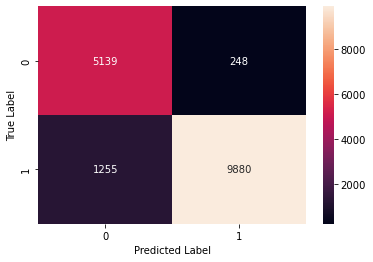

True Positive Rate (TP) - 9880
False Positive Rate (FP) - 248
True Negative Rate (TN) - 5139
False Negative Rate (FN) - 1255


In [66]:
actua = np.array(test_df['classification'])
predicte = np.array(test_df['predi'])

confusionmatrix = metrics.confusion_matrix(actua, predicte, labels = [0, 1])

sns.heatmap(confusionmatrix, annot = True, fmt = 'd')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("True Positive Rate (TP) - {}".format(confusionmatrix[1][1])) 
print("False Positive Rate (FP) - {}".format(confusionmatrix[0][1])) 
print("True Negative Rate (TN) - {}".format(confusionmatrix[0][0])) 
print("False Negative Rate (FN) - {}".format(confusionmatrix[1][0])) 



In [68]:
accurate = accuracy_score(actua, predicte)
precise = precision_score(actua, predicte)
recalled = recall_score(actua, predicte)
print("Accuracy : {}".format(accurate))
print("Precision : {}".format(precise))
print("Recall : {}".format(recalled))


Accuracy : 0.9090303837307832
Precision : 0.9755134281200631
Recall : 0.8872923215087561


<b>-------------------------------------------------------------------<b>

<b>Results evaluation if stopwords are removed:<b>                 

Accuracy : 0.9303353104950974  or 93.03%  
    
Precision : 0.9774292272379494 or 97.74%
    
Recall : 0.9178266726537944 or 91.78 %

<b>Results evaluation if stopwords are not removed:<b>

Accuracy : 0.9090303837307832 or 90.90 %
    
Precision : 0.9755134281200631 or 97.51 %
    
Recall : 0.8872923215087561 or 88.72 %


As shown above, removing stop words increased the model's precision, recall, and accuracy. Because removing them helps the model focus on the fundamentals. Stop words are worthless because they don't provide much information. Remove them to focus on key words.

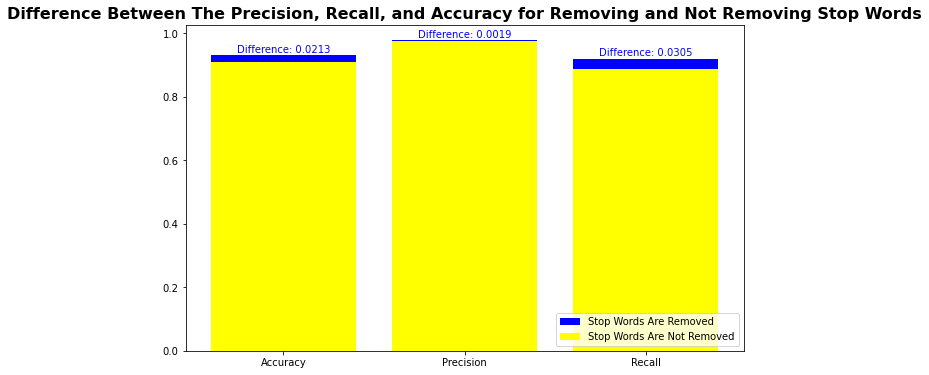

In [113]:
accuracy_notremoved_stopwords = accurate
precision_notremoved_stopwords = precise
recall_notremoved_stopwords = recalled


#Values for the precision, recall, and accuracy for removing stop words
precision_removed_stopwords = 0.9774292272379494
recall_removed_stopwords = 0.9178266726537944
accuracy_removed_stopwords = 0.9303353104950974

plt.figure(figsize = (10, 6))
plt.bar(['Accuracy', 'Precision', 'Recall'], [accuracy_removed_stopwords, precision_removed_stopwords, recall_removed_stopwords], label='Stop Words Are Removed', color = 'blue')
plt.bar(['Accuracy', 'Precision', 'Recall'], [accuracy_notremoved_stopwords, precision_notremoved_stopwords, recall_notremoved_stopwords], label='Stop Words Are Not Removed', color = 'yellow')
plt.text(x = 0, y = accuracy_removed_stopwords + 0.01, s = f"Difference: {accuracy_removed_stopwords - accuracy_notremoved_stopwords:.4f}", color = 'blue', ha = 'center')
plt.text(x = 1, y = precision_removed_stopwords + 0.01, s = f"Difference: {precision_removed_stopwords - precision_notremoved_stopwords:.4f}", color = 'blue', ha = 'center')
plt.text(x = 2, y = recall_removed_stopwords + 0.01, s = f"Difference: {recall_removed_stopwords - recall_notremoved_stopwords:.4f}", color = 'blue', ha = 'center')
plt.legend(loc = 'lower right')
plt.title('Difference Between The Precision, Recall, and Accuracy for Removing and Not Removing Stop Words', fontweight = 'bold', fontsize = 16)
plt.show()

<b>-------------------------------------------------------------------------------<b>

2. Experiment on the number of words used for training. Filter the dictionary to include only
words occurring more than k times (1000 words, then k > 100, and k = 50 times). For
example, the word “offer” appears 150 times, that means that it will be included in the
dictionary.

In [75]:
k = 50

sorted_dict = dict(sorted_dict)
sorted_dict

filter_dict_50 = {x: y for x, y in sorted_dict.items() if y > k}
list_filter_dict_50 = list(filter_dict_50.keys())
print("Filtered dictionary length at k = 50 is {}.".format(len(filter_dict_50)))

k2 = 100
filter_dict_100 = {x: y for x, y in sorted_dict.items() if y > k2}
list_filter_dict_100 = list(filter_dict_100.keys())
print("Filtered dictionary length at k = 100 is {}.".format(len(filter_dict_100)))

Filtered dictionary length at k = 50 is 5461.
Filtered dictionary length at k = 100 is 3265.


In [76]:
def laplace_smoothing(featurematrix_spam, featurematrix_ham, filter_dict):
    prob_spam = np.zeros(len(filter_dict))
    prob_ham = np.zeros(len(filter_dict))
    wordcount_spam = np.sum(featurematrix_spam, axis = 0)
    wordcount_ham = np.sum(featurematrix_ham, axis = 0)
    totalwords_spam = np.sum(wordcount_spam)
    totalwords_ham = np.sum(wordcount_ham)

    param = 1
    num_of_classes = 2
    
    for i in range(len(filter_dict)):
        prob_spam[i] = (wordcount_spam[i] + param)/(totalwords_spam + param*num_of_classes)
        prob_ham[i] = (wordcount_ham[i] + param)/(totalwords_ham + param*num_of_classes)
    return prob_spam, prob_ham

def classifying_emails(email, likelihood_ham, likelihood_spam, p_ham, p_spam, filter_dict, filter_list):
    log_prob_ham = 0
    log_prob_spam = 0
    words = str(email).split()
    for word in words:
        if word in filter_dict:
            log_prob_ham += np.log(likelihood_ham[filter_list.index(word)])
            log_prob_spam += np.log(likelihood_spam[filter_list.index(word)])
    log_prob_ham += np.log(p_ham)
    log_prob_spam += np.log(p_spam)
    if log_prob_ham > log_prob_spam:
        return 0
    else:
        return 1

We'll test the classifier with k = 50.

In [83]:
featurematrix_ham = np.zeros((len(training_ham_df), 10000))
for index in range(len(training_ham_df)):
    for word in str(training_ham_df.iloc[index]['email_message']).split():
        if word in filter_dict_50:
            featurematrix_ham[index][list_filter_dict_50.index(word)] = 1


featurematrix_spam = np.zeros((len(training_spam_df), len(list_filter_dict_50)))
for index in range(len(training_spam_df)):
    for word in str(training_spam_df.iloc[index]['email_message']).split():
        if word in filter_dict_50:
            featurematrix_spam[index][list_filter_dict_50.index(word)] = 1

prob_spam, prob_ham = laplace_smoothing(featurematrix_spam, featurematrix_ham, list_filter_dict_50)

num2_df1 = testing_df.copy()
num2_df1.drop('pred', axis = 1, inplace = True)
num2_df1['pred'] = num2_df1['email_message'].apply(lambda kv: classifying_emails(kv, prob_ham, prob_spam, p_ham, p_spam, filter_dict_50, list_filter_dict_50))

num2_df1

,folder,file,email_message,classification,pred
21300,71,0,where hesitantly derive perverse satisfaction ...,1,1
21301,71,1,things perform experiment display will remain...,0,0
21302,71,2,best offer month viggra ci ialis vaiium xa na...,1,1
21303,71,3,de ar wne cr doesnt matter ow real st mmed ia ...,1,1
21304,71,4,special offer adobe video collection adobe pr...,1,1
...,...,...,...,...,...
37817,126,17,great news expec ted infinex ventures infx pri...,1,1
37818,126,18,the oil sector going crazy weekly gift kkpt th...,1,1
37819,126,19,httpvdtobjdocscaninfo suffering pain depressio...,1,1
37820,126,20,u prosperous future increased money earning po...,1,1


Let's plot the confusion matrix for k = 50.

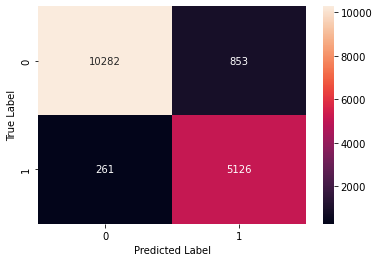

True Positive Rate (TP) - 5126
False Positive Rate (FP) - 853
True Negative Rate (TN) - 10282
False Negative Rate (FN) - 261


In [84]:
actual_50 = num2_df1['classification']
predicted_50 = num2_df1['pred']
confusion_matrix_50 = metrics.confusion_matrix(actual_50, predicted_50, labels = [1, 0])

sns.heatmap(confusion_matrix_50, annot = True, fmt = 'd')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("True Positive Rate (TP) - {}".format(confusion_matrix_50[1][1])) 
print("False Positive Rate (FP) - {}".format(confusion_matrix_50[0][1])) 
print("True Negative Rate (TN) - {}".format(confusion_matrix_50[0][0])) 
print("False Negative Rate (FN) - {}".format(confusion_matrix_50[1][0])) 



In [85]:
accuracy_50 = accuracy_score(actual_50, predicted_50)
precision_50 = precision_score(actual_50, predicted_50)
recall_50 = recall_score(actual_50, predicted_50)


print("Accuracy - {}".format(accuracy_50))
print("Precision - {}".format(precision_50))
print("Recall - {}".format(recall_50))


Accuracy - 0.9325747488197554
Precision - 0.9752442378829556
Recall - 0.9233947013920072


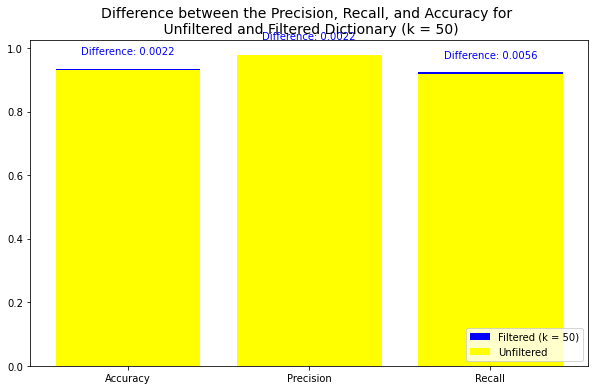

In [112]:
accuracy_unfiltered = accuracy
precision_unfiltered = precision
recall_unfiltered = recall


plt.figure(figsize=(10, 6))
plt.bar(['Accuracy', 'Precision', 'Recall'], [accuracy_50, precision_50, recall_50], label='Filtered (k = 50)', color = 'blue')
plt.bar(['Accuracy', 'Precision', 'Recall'], [accuracy_unfiltered, precision_unfiltered, recall_unfiltered ], label='Unfiltered', color = 'yellow')
plt.text(x = 0, y = accuracy_removed_stopwords + 0.05, s = f"Difference: {abs(accuracy_unfiltered - accuracy_50):.4f}", color='blue', ha='center')
plt.text(x = 1, y = precision_removed_stopwords + 0.05, s = f"Difference: {abs(precision_unfiltered - precision_50):.4f}", color='blue', ha='center')
plt.text(x = 2, y = recall_removed_stopwords + 0.05, s = f"Difference: {abs(recall_unfiltered - recall_50):.4f}", color='blue', ha='center')
plt.title('Difference between the Precision, Recall, and Accuracy for \n Unfiltered and Filtered Dictionary (k = 50)', fontsize = 14)
plt.legend(loc = 'lower right')
plt.show()

We'll test the classifier with k = 100.

In [96]:
featurematrix_ham = np.zeros((len(training_ham_df), 10000))
for index in range(len(training_ham_df)):
    for word in str(training_ham_df.iloc[index]['email_message']).split():
        if word in filter_dict_100:
            featurematrix_ham[index][list_filter_dict_100.index(word)] = 1


featurematrix_spam = np.zeros((len(training_spam_df), len(list_filter_dict_100)))
for index in range(len(training_spam_df)):
    for word in str(training_spam_df.iloc[index]['email_message']).split():
        if word in filter_dict_100:
            featurematrix_spam[index][list_filter_dict_100.index(word)] = 1


prob_spam, prob_ham = laplace_smoothing(featurematrix_spam, featurematrix_ham, list_filter_dict_100)

num2_df2 = testing_df.copy()
num2_df2.drop('pred', axis = 1, inplace = True)
num2_df2['pred'] = num2_df2['email_message'].apply(lambda kv: classifying_emails(kv, prob_ham, prob_spam, p_ham, p_spam, filter_dict_100, list_filter_dict_100))

num2_df2

,folder,file,email_message,classification,pred
21300,71,0,where hesitantly derive perverse satisfaction ...,1,0
21301,71,1,things perform experiment display will remain...,0,0
21302,71,2,best offer month viggra ci ialis vaiium xa na...,1,1
21303,71,3,de ar wne cr doesnt matter ow real st mmed ia ...,1,1
21304,71,4,special offer adobe video collection adobe pr...,1,1
...,...,...,...,...,...
37817,126,17,great news expec ted infinex ventures infx pri...,1,1
37818,126,18,the oil sector going crazy weekly gift kkpt th...,1,1
37819,126,19,httpvdtobjdocscaninfo suffering pain depressio...,1,1
37820,126,20,u prosperous future increased money earning po...,1,1


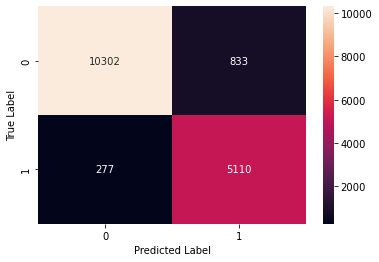

True Positive Rate (TP) - 5110
False Positive Rate (FP) - 833
True Negative Rate (TN) - 10302
False Negative Rate (FN) - 277


In [97]:
actual_100 = num2_df2['classification']
predicted_100 = num2_df2['pred']
confusion_matrix_100 = metrics.confusion_matrix(actual_100, predicted_100, labels=[1, 0])

sns.heatmap(confusion_matrix_100, annot = True, fmt = 'd')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("True Positive Rate (TP) - {}".format(confusion_matrix_100[1][1])) 
print("False Positive Rate (FP) - {}".format(confusion_matrix_100[0][1]))
print("True Negative Rate (TN) - {}".format(confusion_matrix_100[0][0])) 
print("False Negative Rate (FN) - {}".format(confusion_matrix_100[1][0])) 



In [98]:
accuracy_100 = accuracy_score(actual_100, predicted_100)
precision_100 = precision_score(actual_100, predicted_100)
recall_100 = recall_score(actual_100, predicted_100)


print("Accuracy - {}".format(accuracy_100))
print("Precision - {}".format(precision_100))
print("Recall - {}".format(recall_100))


Accuracy - 0.9328168502602591
Precision - 0.9738160506664146
Recall - 0.9251908396946565


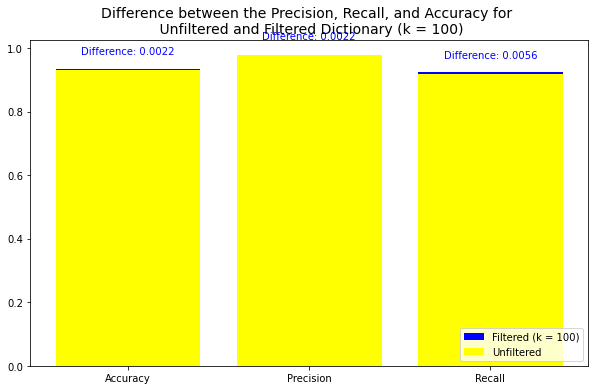

In [110]:
plt.figure(figsize=(10, 6))
plt.bar(['Accuracy', 'Precision', 'Recall'], [accuracy_100, precision_100, recall_100], label='Filtered (k = 100)', color = 'blue')
plt.bar(['Accuracy', 'Precision', 'Recall'], [accuracy_unfiltered, precision_unfiltered, recall_unfiltered ], label='Unfiltered', color = 'yellow')
plt.text(x = 0, y = accuracy_removed_stopwords + 0.05, s = f"Difference: {abs(accuracy_unfiltered - accuracy_50):.4f}", color='blue', ha='center')
plt.text(x = 1, y = precision_removed_stopwords + 0.05, s = f"Difference: {abs(precision_unfiltered - precision_50):.4f}", color='blue', ha='center')
plt.text(x = 2, y = recall_removed_stopwords + 0.05, s = f"Difference: {abs(recall_unfiltered - recall_50):.4f}", color='blue', ha='center')
plt.title('Difference between the Precision, Recall, and Accuracy for \n Unfiltered and Filtered Dictionary (k = 100)', fontsize = 14)
plt.legend(loc = 'lower right')
plt.show()

Comparing filtered dictionaries k = 50 and k = 100

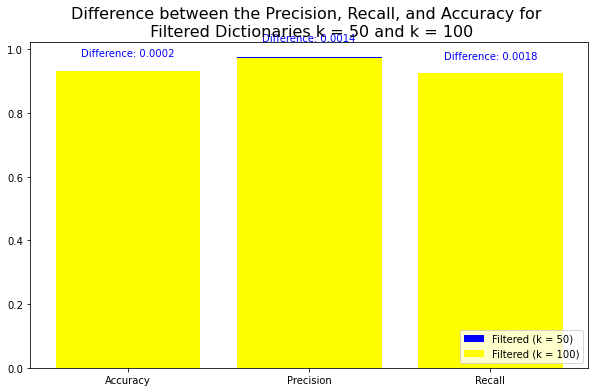

In [111]:
plt.figure(figsize=(10, 6))
plt.bar(['Accuracy', 'Precision', 'Recall'], [accuracy_50, precision_50, recall_50], label='Filtered (k = 50)', color = 'blue')
plt.bar(['Accuracy', 'Precision', 'Recall'], [accuracy_100, precision_100, recall_100], label='Filtered (k = 100)', color = 'yellow')
plt.text(x = 0, y = accuracy_removed_stopwords + 0.05, s=f"Difference: {abs(accuracy_100 - accuracy_50):.4f}", color = 'blue', ha = 'center')
plt.text(x = 1, y = precision_removed_stopwords + 0.05, s = f"Difference: {abs(precision_100 - precision_50):.4f}", color = 'blue', ha = 'center')
plt.text(x = 2, y = recall_removed_stopwords + 0.05, s=f"Difference: {abs(recall_100 - recall_50):.4f}", color = 'blue', ha = 'center')
plt.title('Difference between the Precision, Recall, and Accuracy for \n Filtered Dictionaries k = 50 and k = 100', fontsize=16)
plt.legend(loc = 'lower right')
plt.show()

<b>-----------------------------------------------------------------<b>

3. Discuss the results of the different parameters used for Lambda smoothing. Test it on 5 varying values of the λ (e.g. λ = 2.0, 1.0, 0.5, 0.1, 0.005), Evaluate performance metrics for each.

We'll use k=100 filtered dictionary for faster processing.

<b>λ = 2.0<b>

In [114]:
def laplace_smoothing1(featurematrix_spam, featurematrix_ham, filter_dict):
    prob_spam = np.zeros(len(filter_dict))
    prob_ham = np.zeros(len(filter_dict))
    wordcount_spam = np.sum(featurematrix_spam, axis = 0)
    wordcount_ham = np.sum(featurematrix_ham, axis = 0)
    totalwords_spam = np.sum(wordcount_spam)
    totalwords_ham = np.sum(wordcount_ham)

    param = 2
    num_of_classes = 2
    
    for i in range(len(filter_dict)):
        prob_spam[i] = (wordcount_spam[i] + param)/(totalwords_spam + param*num_of_classes)
        prob_ham[i] = (wordcount_ham[i] + param)/(totalwords_ham + param*num_of_classes)
    return prob_spam, prob_ham

In [116]:
likelihood_spam, likelihood_ham = laplace_smoothing1(featurematrix_spam, featurematrix_ham, filter_dict_100)

testing_df_lambda2 = testing_df.copy()

testing_df_lambda2['pred'] = testing_df_lambda2['email_message'].apply(lambda kv: classifying_emails(kv, likelihood_ham, likelihood_spam, p_ham, p_spam, filter_dict_100, list_filter_dict_100))
testing_df_lambda2

,folder,file,email_message,classification,pred
21300,71,0,where hesitantly derive perverse satisfaction ...,1,0
21301,71,1,things perform experiment display will remain...,0,0
21302,71,2,best offer month viggra ci ialis vaiium xa na...,1,1
21303,71,3,de ar wne cr doesnt matter ow real st mmed ia ...,1,1
21304,71,4,special offer adobe video collection adobe pr...,1,1
...,...,...,...,...,...
37817,126,17,great news expec ted infinex ventures infx pri...,1,1
37818,126,18,the oil sector going crazy weekly gift kkpt th...,1,1
37819,126,19,httpvdtobjdocscaninfo suffering pain depressio...,1,1
37820,126,20,u prosperous future increased money earning po...,1,1


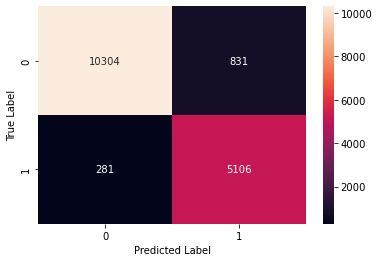

True Positive Rate (TP) - 5106
False Positive Rate (FP) - 831
True Negative Rate (TN) - 10304
False Negative Rate (FN) - 281


In [117]:
actual_lambda2 = testing_df_lambda2['classification']
predicted_lambda2 = testing_df_lambda2['pred']
confusion_matrix_lambda2 = metrics.confusion_matrix(actual_lambda2, predicted_lambda2, labels=[1, 0])

sns.heatmap(confusion_matrix_lambda2, annot = True, fmt = 'd')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("True Positive Rate (TP) - {}".format(confusion_matrix_lambda2[1][1])) 
print("False Positive Rate (FP) - {}".format(confusion_matrix_lambda2[0][1])) 
print("True Negative Rate (TN) - {}".format(confusion_matrix_lambda2[0][0])) 
print("False Negative Rate (FN) - {}".format(confusion_matrix_lambda2[1][0])) 



Below are the accuracy, precision, and recall for the filtered dictionary if k = 100 and λ = 2.0

In [118]:
accuracy_lambda2 = accuracy_score(actual_lambda2, predicted_lambda2)
precision_lambda2 = precision_score(actual_lambda2, predicted_lambda2)
recall_lambda2 = recall_score(actual_lambda2, predicted_lambda2)

print("Accuracy : {}".format(accuracy_lambda2))
print("Precision : {}".format(precision_lambda2))
print("Recall : {}".format(recall_lambda2))


Accuracy : 0.9326957995400073
Precision : 0.9734529995276334
Recall : 0.9253704535249214


<b>λ = 1.0<b>

In [119]:
def laplace_smoothing2(featurematrix_spam, featurematrix_ham, filter_dict):
    prob_spam = np.zeros(len(filter_dict))
    prob_ham = np.zeros(len(filter_dict))
    wordcount_spam = np.sum(featurematrix_spam, axis = 0)
    wordcount_ham = np.sum(featurematrix_ham, axis = 0)
    totalwords_spam = np.sum(wordcount_spam)
    totalwords_ham = np.sum(wordcount_ham)

    param = 1
    num_of_classes = 2
    
    for i in range(len(filter_dict)):
        prob_spam[i] = (wordcount_spam[i] + param)/(totalwords_spam + param*num_of_classes)
        prob_ham[i] = (wordcount_ham[i] + param)/(totalwords_ham + param*num_of_classes)
    return prob_spam, prob_ham

In [120]:

likelihood_spam, likelihood_ham = laplace_smoothing2(featurematrix_spam, featurematrix_ham, filter_dict_100)

testing_df_lambda1 = testing_df.copy()

testing_df_lambda1['pred'] = testing_df_lambda1['email_message'].apply(lambda kv: classifying_emails(kv, likelihood_ham, likelihood_spam, p_ham, p_spam, filter_dict_100, list_filter_dict_100))
testing_df_lambda1

,folder,file,email_message,classification,pred
21300,71,0,where hesitantly derive perverse satisfaction ...,1,0
21301,71,1,things perform experiment display will remain...,0,0
21302,71,2,best offer month viggra ci ialis vaiium xa na...,1,1
21303,71,3,de ar wne cr doesnt matter ow real st mmed ia ...,1,1
21304,71,4,special offer adobe video collection adobe pr...,1,1
...,...,...,...,...,...
37817,126,17,great news expec ted infinex ventures infx pri...,1,1
37818,126,18,the oil sector going crazy weekly gift kkpt th...,1,1
37819,126,19,httpvdtobjdocscaninfo suffering pain depressio...,1,1
37820,126,20,u prosperous future increased money earning po...,1,1


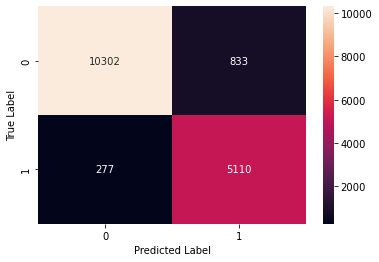

True Positive Rate (TP) - 5110
False Positive Rate (FP) - 833
True Negative Rate (TN) - 10302
False Negative Rate (FN) - 277


In [121]:
actual_lambda1 = testing_df_lambda1['classification']
predicted_lambda1 = testing_df_lambda1['pred']
confusion_matrix_lambda1 = metrics.confusion_matrix(actual_lambda1, predicted_lambda1, labels=[1, 0])

sns.heatmap(confusion_matrix_lambda1, annot = True, fmt = 'd')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("True Positive Rate (TP) - {}".format(confusion_matrix_lambda1[1][1])) 
print("False Positive Rate (FP) - {}".format(confusion_matrix_lambda1[0][1])) 
print("True Negative Rate (TN) - {}".format(confusion_matrix_lambda1[0][0])) 
print("False Negative Rate (FN) - {}".format(confusion_matrix_lambda1[1][0])) 



Below are the accuracy, precision, and recall for the filtered dictionary if k = 100 and λ = 1.0

In [122]:
accuracy_lambda1 = accuracy_score(actual_lambda1, predicted_lambda1)
precision_lambda1 = precision_score(actual_lambda1, predicted_lambda1)
recall_lambda1 = recall_score(actual_lambda1, predicted_lambda1)
print("Accuracy : {}".format(accuracy_lambda1))
print("Precision : {}".format(precision_lambda1))
print("Recall : {}".format(recall_lambda1))


Accuracy : 0.9328168502602591
Precision : 0.9738160506664146
Recall : 0.9251908396946565


<b>λ = 0.5<b>

In [123]:
def laplace_smoothing3(featurematrix_spam, featurematrix_ham, filter_dict):
    prob_spam = np.zeros(len(filter_dict))
    prob_ham = np.zeros(len(filter_dict))
    wordcount_spam = np.sum(featurematrix_spam, axis = 0)
    wordcount_ham = np.sum(featurematrix_ham, axis = 0)
    totalwords_spam = np.sum(wordcount_spam)
    totalwords_ham = np.sum(wordcount_ham)

    param = 0.5
    num_of_classes = 2
    
    for i in range(len(filter_dict)):
        prob_spam[i] = (wordcount_spam[i] + param)/(totalwords_spam + param*num_of_classes)
        prob_ham[i] = (wordcount_ham[i] + param)/(totalwords_ham + param*num_of_classes)
    return prob_spam, prob_ham

In [124]:
likelihood_spam, likelihood_ham = laplace_smoothing3(featurematrix_spam, featurematrix_ham, filter_dict_100)

testing_df_lambdapoint5 = testing_df.copy()

testing_df_lambdapoint5['pred'] = testing_df_lambdapoint5['email_message'].apply(lambda kv: classifying_emails(kv, likelihood_ham, likelihood_spam, p_ham, p_spam, filter_dict_100, list_filter_dict_100))
testing_df_lambdapoint5

,folder,file,email_message,classification,pred
21300,71,0,where hesitantly derive perverse satisfaction ...,1,0
21301,71,1,things perform experiment display will remain...,0,0
21302,71,2,best offer month viggra ci ialis vaiium xa na...,1,1
21303,71,3,de ar wne cr doesnt matter ow real st mmed ia ...,1,1
21304,71,4,special offer adobe video collection adobe pr...,1,1
...,...,...,...,...,...
37817,126,17,great news expec ted infinex ventures infx pri...,1,1
37818,126,18,the oil sector going crazy weekly gift kkpt th...,1,1
37819,126,19,httpvdtobjdocscaninfo suffering pain depressio...,1,1
37820,126,20,u prosperous future increased money earning po...,1,1


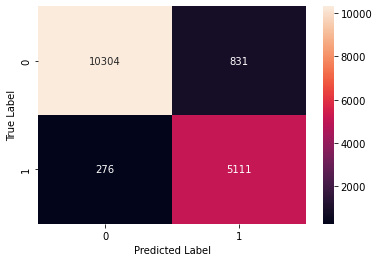

True Positive Rate (TP) - 5111
False Positive Rate (FP) - 831
True Negative Rate (TN) - 10304
False Negative Rate (FN) - 276


In [125]:
actual_lambdapoint5 = testing_df_lambdapoint5['classification']
predicted_lambdapoint5 = testing_df_lambdapoint5['pred']
confusion_matrix_lambdapoint5 = metrics.confusion_matrix(actual_lambdapoint5, predicted_lambdapoint5, labels=[1, 0])

sns.heatmap(confusion_matrix_lambdapoint5, annot = True, fmt = 'd')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("True Positive Rate (TP) - {}".format(confusion_matrix_lambdapoint5[1][1])) 
print("False Positive Rate (FP) - {}".format(confusion_matrix_lambdapoint5[0][1])) 
print("True Negative Rate (TN) - {}".format(confusion_matrix_lambdapoint5[0][0])) 
print("False Negative Rate (FN) - {}".format(confusion_matrix_lambdapoint5[1][0])) 



Below are the accuracy, precision, and recall for the filtered dictionary if k = 100 and λ = 0.5

In [127]:
accuracy_lambdapoint5 = accuracy_score(actual_lambdapoint5, predicted_lambdapoint5)
precision_lambdapoint5 = precision_score(actual_lambdapoint5, predicted_lambdapoint5)
recall_lambdapoint5 = recall_score(actual_lambdapoint5, predicted_lambdapoint5)


print("Accuracy : {}".format(accuracy_lambdapoint5))
print("Precision : {}".format(precision_lambdapoint5))
print("Recall : {}".format(recall_lambdapoint5))


Accuracy : 0.9329984263406367
Precision : 0.9739130434782609
Recall : 0.9253704535249214


<b>λ = 0.1<b>

In [128]:
def laplace_smoothing4(featurematrix_spam, featurematrix_ham, filter_dict):
    prob_spam = np.zeros(len(filter_dict))
    prob_ham = np.zeros(len(filter_dict))
    wordcount_spam = np.sum(featurematrix_spam, axis = 0)
    wordcount_ham = np.sum(featurematrix_ham, axis = 0)
    totalwords_spam = np.sum(wordcount_spam)
    totalwords_ham = np.sum(wordcount_ham)

    param = 0.1
    num_of_classes = 2
    
    for i in range(len(filter_dict)):
        prob_spam[i] = (wordcount_spam[i] + param)/(totalwords_spam + param*num_of_classes)
        prob_ham[i] = (wordcount_ham[i] + param)/(totalwords_ham + param*num_of_classes)
    return prob_spam, prob_ham

In [129]:
likelihood_spam, likelihood_ham = laplace_smoothing4(featurematrix_spam, featurematrix_ham, filter_dict_100)

testing_df_lambdapoint1 = testing_df.copy()

testing_df_lambdapoint1['pred'] = testing_df_lambdapoint1['email_message'].apply(lambda kv: classifying_emails(kv, likelihood_ham, likelihood_spam, p_ham, p_spam, filter_dict_100, list_filter_dict_100))
testing_df_lambdapoint1

,folder,file,email_message,classification,pred
21300,71,0,where hesitantly derive perverse satisfaction ...,1,0
21301,71,1,things perform experiment display will remain...,0,0
21302,71,2,best offer month viggra ci ialis vaiium xa na...,1,1
21303,71,3,de ar wne cr doesnt matter ow real st mmed ia ...,1,1
21304,71,4,special offer adobe video collection adobe pr...,1,1
...,...,...,...,...,...
37817,126,17,great news expec ted infinex ventures infx pri...,1,1
37818,126,18,the oil sector going crazy weekly gift kkpt th...,1,1
37819,126,19,httpvdtobjdocscaninfo suffering pain depressio...,1,1
37820,126,20,u prosperous future increased money earning po...,1,1


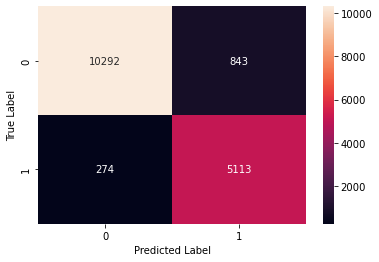

True Positive Rate (TP) - 5113
False Positive Rate (FP) - 843
True Negative Rate (TN) - 10292
False Negative Rate (FN) - 274


In [130]:
actual_lambdapoint1 = testing_df_lambdapoint1['classification']
predicted_lambdapoint1 = testing_df_lambdapoint1['pred']
confusion_matrix_lambdapoint1 = metrics.confusion_matrix(actual_lambdapoint1, predicted_lambdapoint1, labels=[1, 0])

sns.heatmap(confusion_matrix_lambdapoint1, annot = True, fmt = 'd')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("True Positive Rate (TP) - {}".format(confusion_matrix_lambdapoint1[1][1])) 
print("False Positive Rate (FP) - {}".format(confusion_matrix_lambdapoint1[0][1])) 
print("True Negative Rate (TN) - {}".format(confusion_matrix_lambdapoint1[0][0])) 
print("False Negative Rate (FN) - {}".format(confusion_matrix_lambdapoint1[1][0]))




Below are the accuracy, precision, and recall for the filtered dictionary if k = 100 and λ = 0.1

In [131]:
accuracy_lambdapoint1 = accuracy_score(actual_lambdapoint1, predicted_lambdapoint1)
precision_lambdapoint1 = precision_score(actual_lambdapoint1, predicted_lambdapoint1)
recall_lambdapoint1 = recall_score(actual_lambdapoint1, predicted_lambdapoint1)


print("Accuracy : {}".format(accuracy_lambdapoint1))
print("Precision : {}".format(precision_lambdapoint1))
print("Recall : {}".format(recall_lambdapoint1))


Accuracy : 0.9323931727393778
Precision : 0.9740677645277305
Recall : 0.9242927705433318


<b>λ = 0.005<b>

In [132]:
def laplace_smoothing5(featurematrix_spam, featurematrix_ham, filter_dict):
    prob_spam = np.zeros(len(filter_dict))
    prob_ham = np.zeros(len(filter_dict))
    wordcount_spam = np.sum(featurematrix_spam, axis = 0)
    wordcount_ham = np.sum(featurematrix_ham, axis = 0)
    totalwords_spam = np.sum(wordcount_spam)
    totalwords_ham = np.sum(wordcount_ham)
    param = 0.005
    num_of_classes = 2
    for i in range(len(filter_dict)):
        prob_spam[i] = (wordcount_spam[i] + param)/(totalwords_spam + param*num_of_classes)
        prob_ham[i] = (wordcount_ham[i] + param)/(totalwords_ham + param*num_of_classes)
    return prob_spam, prob_ham

In [133]:
likelihood_spam, likelihood_ham = laplace_smoothing5(featurematrix_spam, featurematrix_ham, filter_dict_100)

testing_df_lambdapoint005 = testing_df.copy()

testing_df_lambdapoint005['pred'] = testing_df_lambdapoint005['email_message'].apply(lambda kv: classifying_emails(kv, likelihood_ham, likelihood_spam, p_ham, p_spam, filter_dict_100, list_filter_dict_100))
testing_df_lambdapoint005

,folder,file,email_message,classification,pred
21300,71,0,where hesitantly derive perverse satisfaction ...,1,0
21301,71,1,things perform experiment display will remain...,0,0
21302,71,2,best offer month viggra ci ialis vaiium xa na...,1,1
21303,71,3,de ar wne cr doesnt matter ow real st mmed ia ...,1,1
21304,71,4,special offer adobe video collection adobe pr...,1,1
...,...,...,...,...,...
37817,126,17,great news expec ted infinex ventures infx pri...,1,1
37818,126,18,the oil sector going crazy weekly gift kkpt th...,1,1
37819,126,19,httpvdtobjdocscaninfo suffering pain depressio...,1,1
37820,126,20,u prosperous future increased money earning po...,1,1


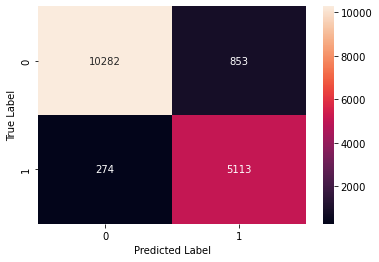

True Positive Rate (TP) - 5113
False Positive Rate (FP) - 853
True Negative Rate (TN) - 10282
False Negative Rate (FN) - 274


In [134]:
actual_lambdapoint005 = testing_df_lambdapoint005['classification']
predicted_lambdapoint005 = testing_df_lambdapoint005['pred']
confusion_matrix_lambdapoint005 = metrics.confusion_matrix(actual_lambdapoint005, predicted_lambdapoint005, labels=[1, 0])

sns.heatmap(confusion_matrix_lambdapoint005, annot = True, fmt = 'd')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("True Positive Rate (TP) - {}".format(confusion_matrix_lambdapoint005[1][1])) 
print("False Positive Rate (FP) - {}".format(confusion_matrix_lambdapoint005[0][1]))
print("True Negative Rate (TN) - {}".format(confusion_matrix_lambdapoint005[0][0])) 
print("False Negative Rate (FN) - {}".format(confusion_matrix_lambdapoint005[1][0])) 



Below are the accuracy, precision, and recall for the filtered dictionary if k = 100 and λ = 0.005

In [135]:
accuracy_lambdapoint005 = accuracy_score(actual_lambdapoint005, predicted_lambdapoint005)
precision_lambdapoint005 = precision_score(actual_lambdapoint005, predicted_lambdapoint005)
recall_lambdapoint005 = recall_score(actual_lambdapoint005, predicted_lambdapoint005)


print("Accuracy : {}".format(accuracy_lambdapoint005))
print("Precision : {}".format(precision_lambdapoint005))
print("Recall : {}".format(recall_lambdapoint005))


Accuracy : 0.9317879191381189
Precision : 0.9740431981811292
Recall : 0.9233947013920072


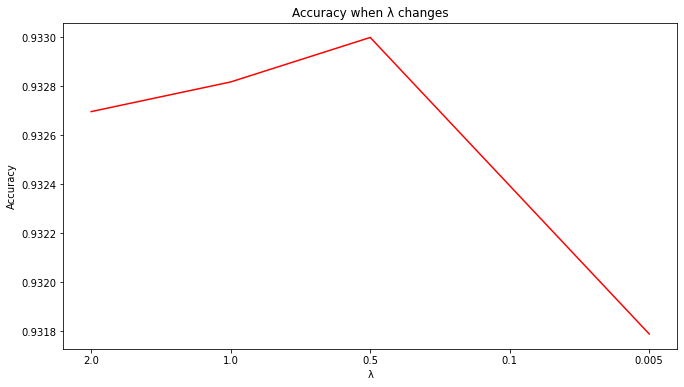

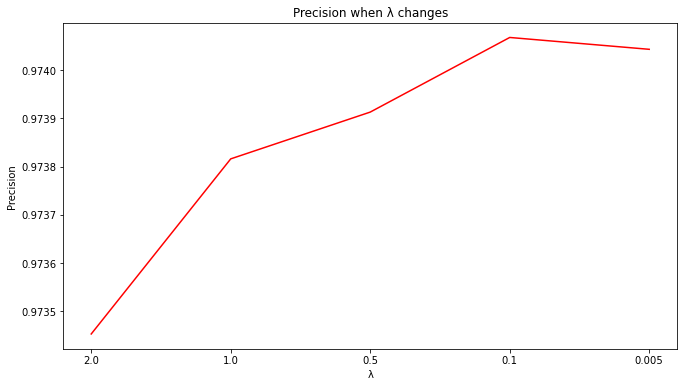

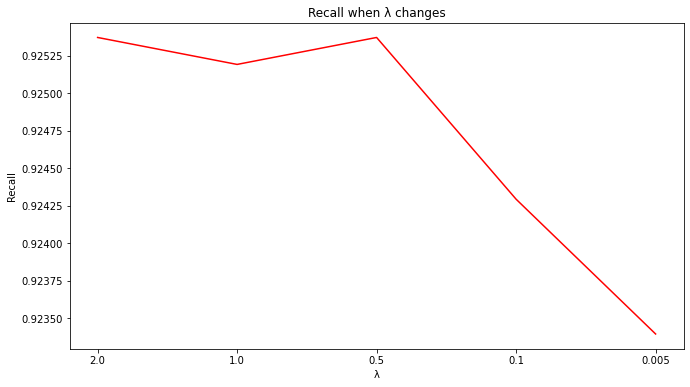

In [140]:
fig, ax = plt.subplots(1, 1, figsize=(11, 6))
ax.plot(['2.0', '1.0', '0.5', '0.1', '0.005'], [accuracy_lambda2, accuracy_lambda1, accuracy_lambdapoint5, accuracy_lambdapoint1, accuracy_lambdapoint005], color = 'red' )
ax.set_title('Accuracy when λ changes')
ax.set_xlabel('λ')
ax.set_ylabel('Accuracy')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(11, 6))
ax.plot(['2.0', '1.0', '0.5', '0.1', '0.005'], [precision_lambda2, precision_lambda1, precision_lambdapoint5, precision_lambdapoint1, precision_lambdapoint005], color = 'red')
ax.set_title('Precision when λ changes')
ax.set_xlabel('λ')
ax.set_ylabel('Precision')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(11, 6))
ax.plot(['2.0', '1.0', '0.5', '0.1', '0.005'], [recall_lambda2, recall_lambda1, recall_lambdapoint5, recall_lambdapoint1, recall_lambdapoint005], color = 'red')
ax.set_title('Recall when λ changes')
ax.set_xlabel('λ')
ax.set_ylabel('Recall')
plt.show()

